In [1]:
import numpy as np
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
from cmath import sqrt


In [2]:
def plot_single_tuning_curve(cell_dictionary,cell_ID):

    fig = plt.figure(1)
    ax = fig.gca()

    # frequency_labels = [5.7,23,45] #,52]
    # intensity_labels = [0,70,80,90] #[50,70,90]

    frequency_labels = [2,4.5,10,23,52]
    # intensity_labels = [30,50,70]
    intensity_labels = [0,50,70,90]

    # get cell ID at this index so we can pull its tuning curve
    # cell_IDs = list(cell_dictionary.keys())
    # cell_of_interest_ID = cell_IDs[cell_IDX]

    cell_tuning = cell_dictionary[cell_ID]['tuning_curve_peak']

    im = plt.imshow(np.transpose(cell_tuning),cmap='jet',origin='lower')
    plt.colorbar(im)
    # plt.xticks([0,1,2])
    # ax.set_xticklabels(frequency_labels)
    # plt.yticks([0,1,2,3])
    # ax.set_yticklabels(intensity_labels)
    plt.xticks([0,2,4,6,8])
    ax.set_xticklabels(frequency_labels)
    plt.yticks([0,2,4,6])
    ax.set_yticklabels(intensity_labels)
    plt.show()

In [3]:
def get_cell_tuning_by_peak(cell_traces,plot_TF):

    a = np.empty((7,9,5), int)

    frequency_counter = 0
    for freq in cell_traces:

        intensity_counter = 0
        for intensity in cell_traces[freq]:
            
            rep_counter = 0
            for rep in cell_traces[freq][intensity]:
                a[intensity_counter,frequency_counter,rep] = cell_traces[freq][intensity][rep]
                rep += 1

            intensity_counter += 1
        
        frequency_counter += 1


    fig,axs = plt.subplots(7)

    for intensity_counter in range(7):
        
        for frequency_counter in range(9):

            for rep_counter in range(5):

                axs[intensity_counter].plot(a[intensity_counter,frequency_counter,rep_counter])


    plt.show()


In [4]:
with open('D:/Lab/2P/Vid_187/cells.pkl', 'rb') as f:
        cell_dictionary = pickle.load(f)


In [5]:
print(cell_dictionary[1].keys())

dict_keys(['traces', 'active', 'tuning_curve_adj', 'tuning_curve_peak'])


True


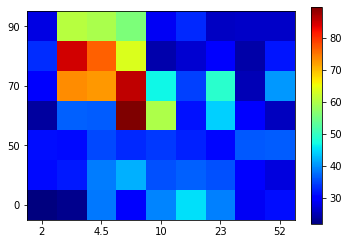

In [6]:
cell_ID = 105
print(cell_dictionary[cell_ID]['active'])
plot_single_tuning_curve(cell_dictionary,cell_ID)
get_cell_tuning_by_peak(cell_dictionary[cell_ID]['traces'],True)
